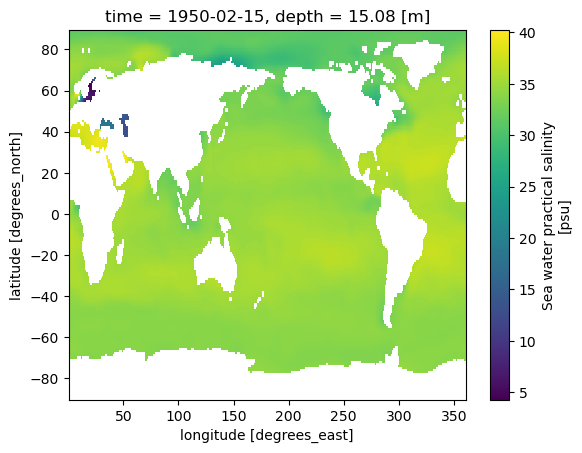

In [7]:
from aqua import Reader,catalogue, inspect_catalogue
import sys
sys.path.append("../")
import ocean_circulation_func as fn



In [ ]:
# Here we load the EN4 observations
reader = Reader(model='EN4',exp='en4',source='monthly')
den4=reader.retrieve()
#den4.so[1,1,:,:].plot()

type: 'Experiment tco2559-ng5 not found in catalog for model EN4.'

In [2]:
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
data = reader.retrieve()

data=data.rename({"nz1":"lev"})
data=data.rename({"ocpt":"thetao"})
data=data[["thetao","so"]]

yearly_data=data.resample(time="Y").mean()
yearly_data

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    thetao   (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>

In [5]:
labrador_sea_mean=fn.weighted_area_mean(yearly_data,50, 65, 300, 325)
converted_labrador_sea_mean= fn.convert_variables(labrador_sea_mean)

In [6]:
converted_labrador  _sea_mean

<xarray.Dataset>
Dimensions:  (lev: 69, time: 5)
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    so       (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
    thetao   (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
    rho      (time, lev) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>

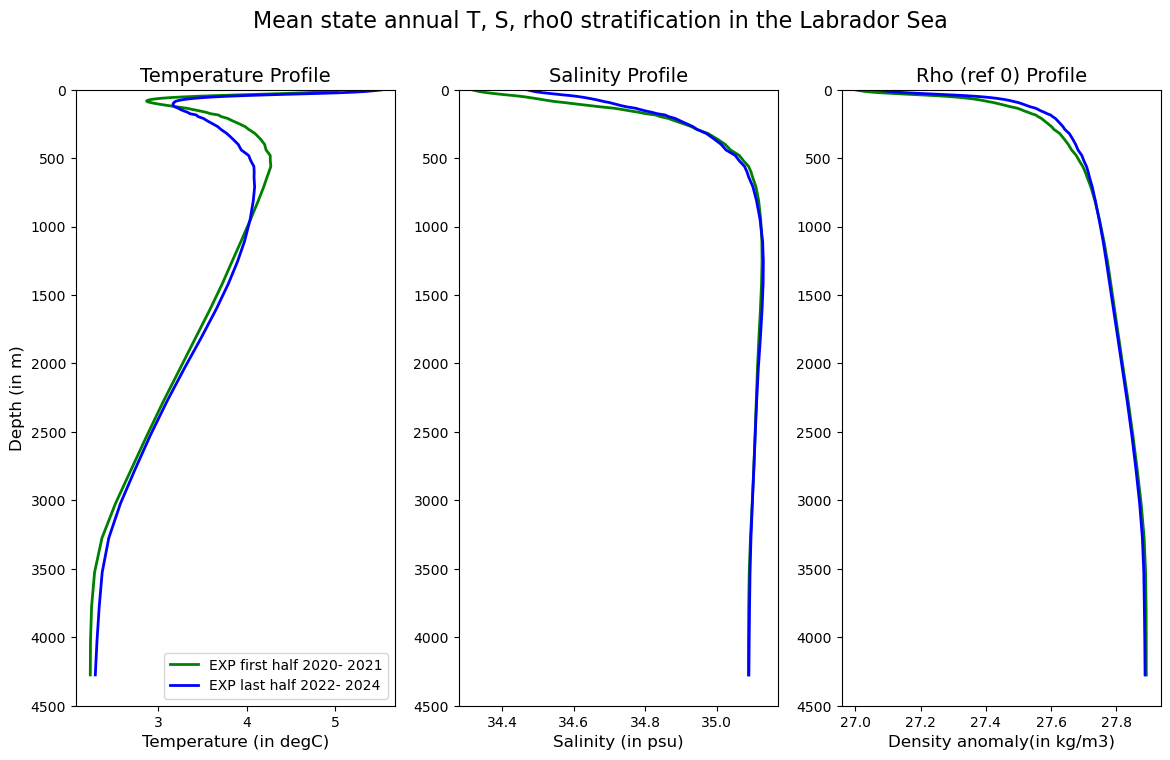

In [5]:
fn.plot_temporal_split(converted_labrador_sea_mean, "Labrador Sea")

FDB5 binary library not present on system, disabling FDB support.


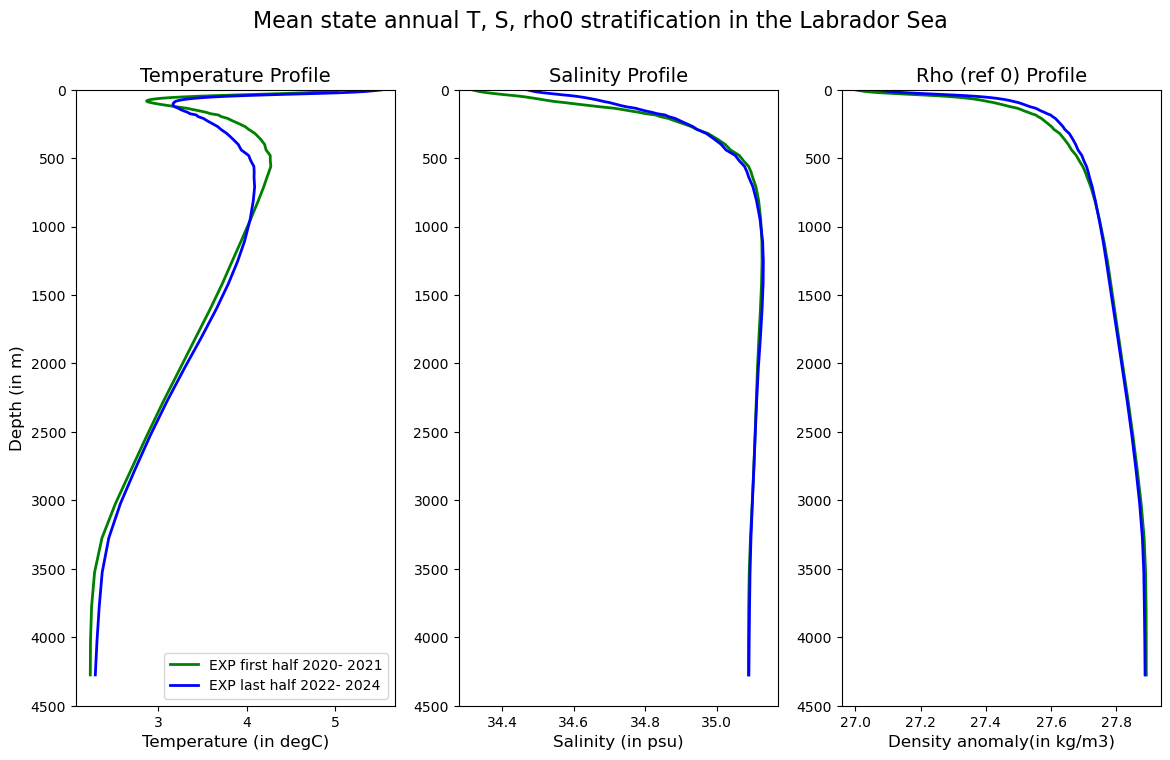

In [1]:
from ocean_circulation_class import Ocean_circulationDiagnostic

# Create an instance of the Ocean_circulationDiagnostic class
diagnostic = Ocean_circulationDiagnostic(model='FESOM', exp='tco2559-ng5-cycle3', source='lra-r100-monthly')

# Run the diagnostics
diagnostic.run_diagnostics()
